## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [2]:
random_data = np.random.random((20,2))
random_data

array([[0.11576998, 0.37269811],
       [0.03061676, 0.81885658],
       [0.52726211, 0.34343358],
       [0.01598137, 0.10765268],
       [0.87989479, 0.73981107],
       [0.8036541 , 0.00731181],
       [0.87818313, 0.88435821],
       [0.14572385, 0.45295005],
       [0.87676293, 0.58218889],
       [0.70125363, 0.66577956],
       [0.82716639, 0.03576304],
       [0.45400566, 0.92474241],
       [0.95336159, 0.46049033],
       [0.26288975, 0.73889339],
       [0.83569768, 0.10385047],
       [0.07416102, 0.78180677],
       [0.93642447, 0.56675701],
       [0.27744611, 0.7576246 ],
       [0.20463632, 0.29417   ],
       [0.01944375, 0.54176593]])

In [3]:
X = random_data[:,0]
y = random_data[:,1]

In [4]:
def assuming_function(x):
    '''假设函数，生成一些样本'''
    return 16.12*x + 6 + random.randint(-5,5)

In [5]:
y = [assuming_function(x) for x in X]

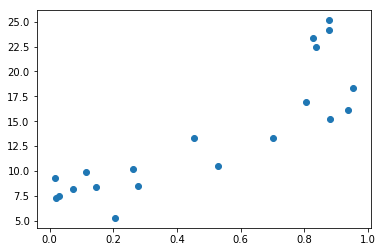

In [6]:
plt.scatter(X,y)

In [7]:
y = np.array(y)

In [8]:
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [9]:
reg.score(X.reshape(-1,1),y)

0.742331633179674

In [10]:
reg.coef_  #系数

array([14.82007327])

In [11]:
reg.intercept_   #常数

6.388285821599273

In [12]:
def fit_model(x):
    return reg.coef_*x + reg.intercept_

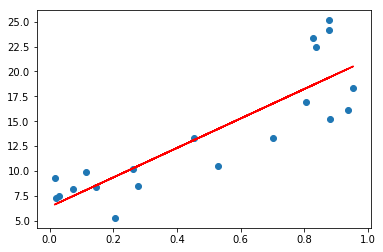

In [13]:
plt.scatter(X,y)
plt.plot(X,fit_model(X),color = 'red')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [14]:
from scipy.spatial.distance import cosine 
import operator

In [15]:
'''
def model(X,y):
    '''直接存储值x  y即可'''
    return [(Xi,yi) for Xi,yi in zip(X,y)]
def distance(x1,x2):
    return cosine(x1,x2)

def vote(ys):
    ys_unique = np.unique(ys)
    vote_dict = {}
    for y in ys:
        if y not in vote_dict.keys():
            vote_dict[y] = 1
        else:
            vote_dict[y]  += 1
    sorted_vote_dict = sorted(vote_dict.items(),key = operator.itemgetter(1),reverse=False)
    return sorted_vote_dict[0][0]
'''

SyntaxError: invalid syntax (<ipython-input-15-a57b3161d922>, line 3)

In [ ]:
'''
def predict(x,y,k = 5):
    """在predicate的时候，需要做大量的计算"""
#     most_similars = sorted(model(X,y),key = lambda xi: distance(xi[0],x))[:k]
    y_pred = []
    for i in range(len(x)):
        dist_arr = [distance(x[i],x[j]) for j in range(len(x))]
        sorted_index = np.argsort(dist_arr)
        top_k_index = sorted_index[:k]
        y_pred.append(vote(y[top_k_index]))
    return np.array(y_pred)


def score(y_true=None,y_pred=None):
    if y_true is None or y_pred is None:
        y_pred = predict(x,y)
        y_true = y
    score = 0.0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            score +=1
    score /= len(y_true)
    
    return score
    
        
        # -> regression:numerical  -> most_similars(y)
    # ->classification:categorical -> most_similar(y)
    # 简单应用中，一般使用欧氏距离
    # 但对于文本分类来说，使用余弦(cosine)来计算相似度就比欧式(Euclidean)距离更合适
'''

In [ ]:
#第一种knn算法
# 设置training_data
'''
data_size_1 = 300
x1_1 = np.random.normal(loc = 5.0,scale = 1.0,size= data_size_1)
x1_2 = np.random.normal(loc = 4.0,scale = 1.0,size= data_size_1)
y_1 = [0 for _ in range(data_size_1)]
# plt.scatter(x1_1,x1_2)

data_size_2 = 400
x2_1 = np.random.normal(loc = 10.0,scale = 2.0,size= data_size_2)
x2_2 = np.random.normal(loc = 8.0,scale = 2.0,size= data_size_2) 
y_2 = [1 for _ in range(data_size_2)]

x_1 = np.concatenate((x1_1,x2_1),axis = 0)
x_2 = np.concatenate((x1_2,x2_2),axis = 0)
 
x = np.hstack((x_1.reshape(-1,1),x_2.reshape(-1,1)))
y  = np.concatenate((y_1,y_2),axis = 0)



# data_size_all = data_size_1 + data_size_2
# shuffled_index = np.random.permutation(data_size_all)
# x = x[shuffled_index]
# y = y[shuffled_index]


# split_index = int(data_size_all*0.7)
# x_train = x[:split_index]
# y_train = y[:split_index]
# x_test = x[split_index:]
# y_test = y[split_index:]

# plt.scatter(x_train[:,0],x_train[:,1],c = y_train)
# plt.scatter(x_test[:,0],x_test[:,1],c = y_test)

# data
# plt.scatter(x[:,0],x[:,1],c= y)


#data preprocessing  归一化
# x_train  = (x_train - np.min(x_train,axis = 0)) / (np.max(x_train,axis = 0)-np.min(x_train,axis = 0))
# x_test = (x_test - np.min(x_test,axis = 0)) / (np.max(x_test,axis = 0)-np.min(x_test,axis = 0))


# #knn classifier
# clf = KNN(k=3)
# clf.fit(x_train,y_train)
# score_train = clf.score()

# print("training accuracy is {:.3}".format(score_train))

# y_test_pred = clf.predict(x_test)
# print("test accuracy is {:.3}".format(clf.score(y_test,y_test_pred)))
# x_test1 = [[1,2],[3,4]]
# clf.predict(x_test1)
# print(x)
# x[:,0]
# clf = predict(x,y)
'''

In [ ]:
#第一种knn算法
class KNN(object):
    def __init__(self,k=5):
        self.k = k
        
    def fit(self,x,y):
        self.x = x
        self.y = y
    def _square_distance(self,x1,x2):
        return np.sum(np.square(x1-x2))
       
    def _vote(self,ys):
        ys_unique = np.unique(ys)
        vote_dict = {}
        for y in ys:
            if y not in vote_dict.keys():
                vote_dict[y] = 1
            else:
                vote_dict[y] += 1
        sorted_vote_dict = sorted(vote_dict.items(),key = operator.itemgetter(1),reverse=False)
        return sorted_vote_dict[0][0]
    
    
    
    def predict(self,x):
        y_pred = []
        for i in range(len(x)):
            dist_arr = [self._square_distance(x[i],self.x[j]) for j in range(len(self.x))]
            sorted_index = np.argsort(dist_arr)
            top_k_index = sorted_index[:self.k]
            y_pred.append(self._vote(ys = self.y[top_k_index]))
            
        return np.array(y_pred)
    
    def score(self,y_true=None,y_pred=None):
        if y_true is None or y_pred is None:
            y_pred = self.predict(self.x)
            y_true = self.y
        score = 0.0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                score += 1
        score /= len(y_true)
        return score  


In [ ]:
# data_idex = np.random.permutation(700)  #打乱index的顺序
# a =  [5,4,3,2,1]
# a1 = np.argsort(a)
# b = {1:"b",2:"a"}
# sorted(b.items(),key = operator.itemgetter(1))[0][0]
# a = [[1,2],[3,4]]
# b = [[3,4],[5,6]]
# a = np.array(a)
# b = np.array(b)
# a1 = np.sum(np.square(a-b))
# # a1
# a[0]
# a  = [1,2,3,4]
# a = np.array(a)
# b =  [3,2,1,0]
# # set(a)
# a1 = a[b]  #只有数组可以用列表索引
# a1


# a = [[1,2],[3,4],[2,1]]
# a = np.array(a)
# np.min(a,axis =0)   #按列取最小    array([1, 1])
# b =a - np.min(a,axis =0) 
# b     #array([[0, 1], [2, 3],[1, 0]])

In [ ]:
#第二个knn算法
'''
data1 = [np.random.random() for _ in range(100)]
data2 = [np.random.random()+ random.randint(0,1) for _ in range(100)]
labels1 = [0 for _ in range(40)]
labels2 = [1 for _ in range(60)]
labels_all = labels1 + labels2
shuffled_index = np.random.permutation(100)
data1 = np.array(data1)
data2 = np.array(data2)
labels_all = np.array(labels_all)
data1 = data1[shuffled_index]
data2 = data2[shuffled_index]
labels_all = labels_all[shuffled_index]

In [ ]:
# x = np.hstack(data1.reshape(-1,1),data2.reshape(-1,1),axis
#x = np.concatenate((data1,data2),axis=0) 
x = np.hstack((data1.reshape(-1,1),data2.reshape(-1,1)))
model_data = model(x,labels_all)
# model_data[0][0][0]
# y_pred1 = predict(x,x,labels_all)
plt.scatter(x[:,0],x[:,1],c= labels_all)
# print("training accuracy is {:.3}".format(score(labels_all,y_pred1)))
'''

In [ ]:
#试验
# x = np.array([1,2,3,4])
# y = np.array([5,6,7,8])
# x2 = np.array([11,2,4,5])
# y2 = np.array([23,4,4,54])
# z2 = np.concatenate((x2,y2))
# z = np.concatenate((x,y),axis = 0)
# z3= np.hstack((z.reshape(-1,1),z2.reshape(-1,1)))
# distance(z3[0],z3[1])
# z3[0]

In [ ]:
#第二种knn算法
'''
def model(X,y):
    '''直接存储值x  y即可'''
    return [(Xi,yi) for Xi,yi in zip(X,y)]
def distance(x1,x2):
    return cosine(x1,x2)
def vote_cls(ys):
    dict_vote = {}
    for y in ys:
        if y not in dict_vote.keys():
            dict_vote[y] = 1
        else:
            dict_vote[y] += 1
    sorted_dic = sorted(dict_vote.items(),key=operator.itemgetter(1),reverse=False)
    return sorted_dic[0][0]


def predict(x_test,x_training,y_labels,k=3):
    y_pred = []
    for i in range(len(x_test)):
        dist_attr = [distance(x_test[i],x_training[j]) for j in range(len(x_training))]
        sorted_dist = np.argsort(dist_attr)
        top_k_index = sorted_dist[:k]
        y_pred.append(vote_cls(y_labels[top_k_index]))
    return np.array(y_pred)

def score(y_true,y_pred):
    score =0.0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            score +=1
    score /= len(y_true)
    return score
'''

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [16]:
# you code here
from collections import Counter
import pandas as pd
%matplotlib inline
from icecream import ic
import sys
sys.setrecursionlimit(3000)

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i))$$

In [18]:
def entropy(element):
    counter = Counter(element)
    probs = [counter[c] / len(element) for c in set(element)]
    #ic(probs)
    return -sum([p*np.log2(p) for p in probs])

In [19]:
entropy([1,1,1,1])

-0.0

In [ ]:
entropy(['a', 'a', 'b', 'b', 'c'])

In [ ]:
entropy([1,2,3,4])

In [ ]:
entropy([1,2,2,4])

In [ ]:
entropy([1,1,3,4])

In [22]:
data_relational = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'loacation': ['C', 'V', 'V', 'C', 'C', 'C', 'V'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
    'pet':[1, 1, 1, 0, 0, 0 ,1]
}

In [24]:
dataset = pd.DataFrame.from_dict(data_relational)
# dataset[dataset["gender"]=="F"]["bought"].tolist()

In [25]:
# split_by_gender:
print(entropy([1,1,1,0]) +entropy([0,0,1]))

# split_by_location:
print(entropy([1,0,0,0]) +entropy([1,1,1]))

# split_by_family_number:
print(entropy([1,1,0,0,0]) + entropy([1,1]))



# split_by_pet:
entropy([1,1,1,1]) + entropy([0, 0, 0, 0])

1.7295739585136225
0.8112781244591328
0.9709505944546686


-0.0

In [26]:
def find_optimal_spilter(training_data:pd.DataFrame,target:str)->str:
    x_field = set(training_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float("inf")
    for f in x_field:
        ic(f)
        values = set(training_data[f])
        
        for v in values:
            sub_split_1 = training_data[training_data[f]==v][target].tolist()
#             ic(sub_split_1)
            entropy_1 = entropy(sub_split_1)
            ic(entropy_1)
    
    

            sub_split_2 = training_data[training_data[f]!=v][target].tolist()
#             ic(sub_split_2)
            entropy_2 =  entropy(sub_split_2)
            ic(entropy_2)

    
            entropy_all = entropy_1 + entropy_2
            if  entropy_all < min_entropy and entropy_1 <= entropy_2:
                min_entropy = entropy_all
                spliter = (f,v)
            elif  entropy_1 > entropy_2:
                continue
            
    print("min_entropy is {}".format(min_entropy))
    print("spliter is {}".format(spliter))
    return spliter

In [ ]:
find_optimal_spilter(dataset,"bought")

In [ ]:
find_optimal_spilter(dataset[dataset["pet"]==0],"bought")

In [ ]:
entropy(dataset[dataset["loacation"]=="C"]["bought"].tolist())

In [ ]:
entropy(dataset[dataset["loacation"]=="V"]["bought"].tolist())

In [ ]:
# dataset[dataset["loacation"]=="C"
find_optimal_spilter(dataset[dataset["loacation"]=="C"],"bought")

# 分割到这个层次，无法分割

**信息增益算法**

输入：训练数据集D和特征A

输出：特征A对训练数据集D的信息熵的增加$g(D, A)$

1. 计算数据集D的熵$H(D)$

$$H(D)=-\sum_{k=1}^{K}\frac{|C_k|}{|D|}\log\frac{|C_k|}{|D|}$$

2. 计算特征A对数据集D的条件熵$H(D|A)$

$$H(D|A)=\sum_{i=1}^{n}\frac{|D_i|}{|D|}H(D_i) = \sum_{i=1}^{n}\frac{|D_i|}{|D|}\sum_{k=1}^{K}\frac{|D_{ik}|}{|D_i|}\log\frac{|D_{ik}|}{|D_i|}$$

3. 计算信息增益

$$g(D,A) = H(D) - H(D|A)$$

In [28]:
def infor_gain(data1:list,data2:list):
    '''information gain'''
    if len(data1) ==0  or len(data2) == 0:
        return 0.0
    
    data_all = data1 + data2 
    data_all_e = entropy(data_all)
    data1_e = entropy(data1)
    data2_e = entropy(data2)
    n = len(data1) / len(data_all)
    
    return data_all_e - sum([data1_e*n ,data2_e * (1-n)])

In [30]:
l =  [1,1,1,2,2,3,3,4,4,4,5]

In [31]:
infor_gain(l[:8],l[8:])

0.5949066182439395

In [32]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
mock_Dataset = pd.DataFrame(mock_data)

In [33]:
mock_Dataset["gender"][0]
# mock_Dataset.empty

'F'

**Build decision tree**

In [35]:
class Node(object):
    '''
    Tree Node
    '''
    def __init__(self,feature = None,left = None,right = None,result = None,**kwargs):
        self.feature = feature
        self.left = left
        self.right = right
        self.result = result

In [37]:
def data_divide(dataset,col,val):
    if isinstance(val,(float,int)):
        #numerical value
        dataset_1 = dataset[dataset[col]<=val]
        dataset_2 = dataset[dataset[col]>val]
    else:
        dataset_1 = dataset[dataset[col]==val]
        dataset_2 = dataset[dataset[col]!=val]
    return dataset_1,dataset_2

In [39]:
q = [2,1,4,5,3]
set(q)

{1, 2, 3, 4, 5}

In [41]:
dataset_1 , dataset_2 = data_divide(mock_Dataset,"gender","F")

In [43]:
def build_tree(dataset:pd.DataFrame,target,**kwargs):
    
    if dataset.empty: return None
    best_gain = 0.0
    split_data = ()
    col = dataset.columns[:-1]
    best_feature = ()
    #chooose feature
    for i,cols in enumerate(col):
        for val in set(dataset[cols]):
            dataset1, dataset2 = data_divide(dataset, cols, val)
            
            #gain_infromation
            data_list1 = dataset1[target].tolist()
            data_list2 = dataset2[target].tolist()
            gain_infor_build = infor_gain(data_list1,data_list2)
            if gain_infor_build > best_gain:
                best_gain = gain_infor_build
                best_feature = (i,val)
                split_data = (dataset1,dataset2)
                
    if best_gain >0.0:
        left_node = build_tree(split_data[0],target)
        right_node = build_tree(split_data[1],target)
        return Node(feature=best_feature,left=left_node,right=right_node,result=dataset[target].tolist())
    else:
        return Node(result = dataset[target].tolist())
            
    

In [44]:
decision_tree = build_tree(mock_Dataset,"bought")

In [45]:
import time
to_str = lambda x:map(str,x)
def tranverse_tree(tree):
    if tree.feature:
        print("tree.feature is {},result is {}".format(":".join(to_str(tree.feature)),",".join(to_str(tree.result))))
        time.sleep(2)
    else:
        print("leaf.node result is  {}".format(",".join(to_str(tree.result))))
    if tree.left:
        tranverse_tree(tree.left)
    if tree.right:
        tranverse_tree(tree.right)

In [46]:
tranverse_tree(decision_tree)

tree.feature is 1:-10,result is 1,1,1,0,0,0,1
leaf.node result is  1,1
tree.feature is 0:M,result is 1,1,0,0,0
leaf.node result is  0,0
tree.feature is 2:1,result is 1,1,0
leaf.node result is  1,0
leaf.node result is  1


In [47]:
#print(decision_tree.feature)
# def p():
#     return Node(feature="23")
# a1 = p()
# a1.feature
# a = (1,2)
# b = ".".join(to_str(a))
# b

In [48]:
#试验
# a = [1,2]
# b = np.tile(a,(4,1,1))  #括号里，对应的是，行重复4次，列重复1次，整体重复2次
# b

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [49]:
from sklearn.cluster import KMeans

In [50]:
X1 = [np.random.randint(0,100) for _ in range(100)]
X2 = [np.random.randint(0,100) for _ in range(100)]

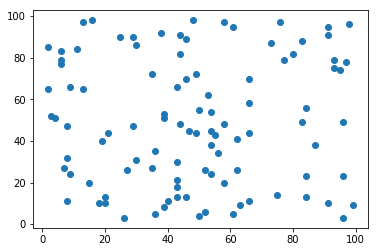

In [51]:
plt.scatter(X1,X2)

In [52]:
training_data = [(x1,x2) for x1,x2 in zip(X1,X2)]

In [53]:
cluster = KMeans(n_clusters=6,max_iter=500)

In [54]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
cluster.cluster_centers_

array([[49.95238095, 50.14285714],
       [82.25      , 83.6875    ],
       [89.1       , 23.1       ],
       [22.26315789, 83.63157895],
       [14.46666667, 29.2       ],
       [48.        , 14.73684211]])

In [56]:
cluster.labels_

array([0, 2, 4, 0, 4, 0, 3, 3, 0, 5, 1, 1, 2, 2, 1, 0, 0, 5, 5, 5, 5, 5,
       5, 0, 3, 1, 1, 5, 4, 1, 3, 2, 3, 4, 0, 4, 0, 1, 4, 5, 3, 4, 2, 3,
       1, 3, 0, 1, 3, 0, 3, 1, 3, 0, 0, 1, 3, 0, 1, 5, 5, 3, 4, 3, 2, 1,
       3, 4, 5, 4, 1, 5, 0, 4, 3, 5, 0, 3, 0, 5, 0, 3, 3, 2, 4, 0, 5, 1,
       5, 0, 2, 4, 0, 2, 1, 4, 5, 5, 2, 4])

In [57]:
from collections import defaultdict

In [58]:
center = defaultdict(list)
for labels,location in zip(cluster.labels_,training_data):
    center[labels].append(location)

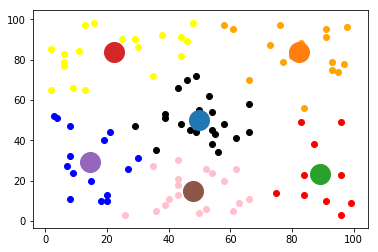

In [59]:
color = ["black","orange","red","yellow","blue","pink"]
for i,c in enumerate(center):
    for j in center[i]:
        plt.scatter(*j,c = color[i])
        
for e in cluster.cluster_centers_:
    plt.scatter(*e,s =400)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> 模型是一个表征数据特征的一种数学表达，由于样本的随机性，模型预测精度对样本的质量和数量依赖性较大，因此，模型总是在不断的优化中，没有一个模型是绝对正确的，只是达到工程应用的期望水平。

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')
过拟合的原因有四个：1、模型过于复杂   2、数据过少   3、数据分布不对   4、模型系数过大  这会导致模型遇到新数据，误差较大，适应性差。
欠拟合的原因主要是模型过于简单，泛化能力差。可以减少模型中的正则化参数，增加多个特征属性，还可以添加多项式特征。

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)
准确率acc：样本中类别预测正确的比例，模型类别预测的正确能力。


精确率pr：被预测为正例的样本中，真实的正例所占的比例，精确率反映模型在正例上的预测能力，该指标的关注点在正例上，如果我们对正例的预测准确性很关注，那么精确率是一个不错的指标。


召回率：真实的正例样本中，被预测为正例的样本所占的比例。召回率反映模型在正例正确预测上的覆盖率，例如在一些灾害检测的场景中，任何一次灾害的漏检都是难以接受的，此时召回率是很合适的指标。

AUC(area under curve)是一个数值，从定义上可以直观的看到其表征的意思——曲线与坐标轴围成的面积。

F1-score ：兼顾精准率与召回率的模型评价指标。当对精准率或者召回率没有特殊要求时，评价一个模型的优劣就需要同时考虑精准率与召回率，此时可以考虑使用F1-score。F1-score实际上是precision与recall的调和平均值。


$$F2= 5 * \frac{Precision * Recall}{4*Precision + Recall}$$

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）
机器学习是基于传统的分析式编程上。用大量的数据去训练某个数学模型，使得模型具有预测或者分类功能，而不需要手动去写分类功能，更加依赖于数据。

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

模型的好坏，可以用评价标准来衡量，然后评价标准要跟现实应用的背景相结合起来，定义一个较合适的评价标准，有助于人们对模型的好坏做出更精准的判断。

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [60]:
# you code here
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [61]:
mock_dataset = pd.DataFrame(mock_data)

In [62]:
mock_dataset.head()

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0


In [63]:
def predict(tree,x):
    "预测"
    if tree.feature:
        
        num , val = tree.feature
        if isinstance(x[num],(float,int)):
            if x[num] <= val:
                return predict(tree.left,x)
            else:
                return predict(tree.right,x)
        else:
            if x[num] == val:
                return predict(tree.left,x)
            else:
                return predict(tree.right,x)
    else:
        counter = Counter(tree.result)
        return counter.most_common()[0][0]

In [69]:
predict(decision_tree,['M',"+10",1])

0

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [70]:
# you code here
from sklearn.datasets import load_boston

In [72]:
boston_load = load_boston()

In [82]:
boston_load.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [89]:
boston_df = pd.DataFrame(np.hstack([boston_load.data,boston_load.target.reshape(-1,1)]),
                                   columns = list(boston_load.feature_names) + ["PRICE"])

In [91]:
# boston_df

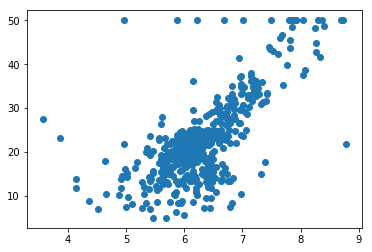

In [92]:
plt.scatter(boston_df["RM"],boston_df["PRICE"])

In [93]:
#boston_load["DESCR"]

$$L = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$$

$$ f(x)= w*x + b $$

In [94]:
def price(x, w, b):
    return w * x + b

In [95]:
def loss_function(y,y_hat):
    return sum([np.abs(y_i-y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))])/len(list(y))

Optimize Function: Gradient Descent



Gradient $\frac{\partial{L}}{\partial{w}}$ $\frac{\partial{L}}{\partial{b}}$

$$\frac{\partial{L}}{\partial{w}}=-\frac{1}{n}\sum{\frac{(y_i - \hat y_i)x_i}{|y_i - \hat y_i|}}$$

$$\frac{\partial{L}}{\partial{b}}=-\frac{1}{n}\sum{\frac{(y_i - \hat y_i)}{|y_i - \hat y_i|}}$$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}(\sum_{y_i>\hat{y_i}}{-x_i}+\sum_{y_i<\hat{y_i}}{x_i})$$
$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}(\sum_{y_i>\hat{y_i}}{-1} + \sum_{y_i<\hat{y_i}}{1})$$

In [269]:
#define partial derivatives
def partial_derivatives_w(x,y,y_hat):
    n = len(y)
    gradient = 0
    return -sum([(yi - yi_hat) * xi for xi, yi, yi_hat in zip(list(x),list(y), list(y_hat))])/ n

def partial_derivatives_b(y,y_hat):
    n = len(y)
    gradient = 0
    return -sum([(yi - yi_hat) for  yi, yi_hat in zip(list(y), list(y_hat))])/ n


In [322]:
class LRmodel(object):
    
    def __init__(self,iter_num = 300,learning_rate = 1e-3):
        self.w =  np.random.random()*200 - 100
        self.b =  np.random.random()*200 - 100
        self.iter_num = iter_num
        self.learning_rate = learning_rate
        self.losses = []
    def train(self,x,y):
        self.losses = []
        w = self.w
        b = self.b
        for i in range(self.iter_num):
            y_hat = [price(xi,w,b) for xi in x]
            loss_y = loss_function(y,y_hat)
            self.losses.append(loss_y)
            print("Iteration: {}, the loss is {}, Parameters w is {} and b is {}".format(
                            i,loss_y,self.w,self.b))
            w_gradient = partial_derivatives_w(x,y,y_hat)
            b_gradient = partial_derivatives_b(y,y_hat)
            
            w = w - w_gradient*self.learning_rate
            b = b - b_gradient*self.learning_rate
        self.w = w
        self.b = b
    def predict_rl(self,x):
        return [self.w *xi + self.b  for xi in x]

In [308]:
X = boston_df["RM"]
Y = boston_df["PRICE"]

In [309]:
X.shape
# np.arange(1,10,0.1)

(506,)

In [323]:
lr = LRmodel()
lr.train(X,Y)

Iteration: 0, the loss is 659.2597262450636, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 1, the loss is 632.2487559916102, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 2, the loss is 606.3446223514898, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 3, the loss is 581.5019701476583, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 4, the loss is 557.6773027358121, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 5, the loss is 534.8289058467286, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 6, the loss is 512.9167745493551, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 7, the loss is 491.9025432067383, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 8, the loss is 471.74941830217716, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 9, the loss is 4

Iteration: 75, the loss is 28.677232844270932, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 76, the loss is 27.505827871507513, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 77, the loss is 26.382423868273882, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 78, the loss is 25.30505388439467, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 79, the loss is 24.271831570003634, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 80, the loss is 23.28094787276089, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 81, the loss is 22.33066787040886, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 82, the loss is 21.419327733121285, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 83, the loss is 20.545331810327745, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 84

Iteration: 173, the loss is 4.501837658075716, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 174, the loss is 4.49864462806655, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 175, the loss is 4.495737293189804, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 176, the loss is 4.493028390121381, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 177, the loss is 4.490505741676532, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 178, the loss is 4.488137486212143, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 179, the loss is 4.48590307257013, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 180, the loss is 4.483853985550859, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 181, the loss is 4.481960244790495, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 1

Iteration: 274, the loss is 4.451362406815642, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 275, the loss is 4.451344174967971, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 276, the loss is 4.451326669751292, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 277, the loss is 4.451309861390474, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 278, the loss is 4.451293721330493, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 279, the loss is 4.451278222186431, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 280, the loss is 4.451263337695523, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 281, the loss is 4.451249042671201, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration: 282, the loss is 4.451235312958948, Parameters w is -92.03873599778993 and b is -58.29711470084995
Iteration:

In [311]:
# a = 1e-1
# a

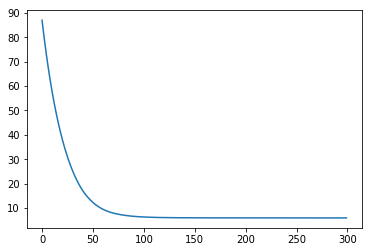

In [316]:
plt.plot(np.arange(lr.iter_num),lr.losses)

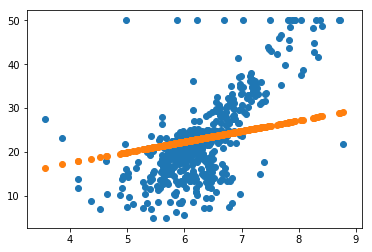

In [320]:
y_predict = lr.predict_rl(X)
y_predict = np.array(y_predict)
X.shape,y_predict.shape
plt.scatter(X,Y)
plt.scatter(X,y_predict)

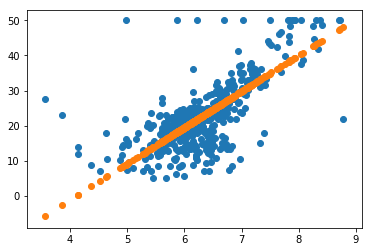

In [324]:
y_predict = lr.predict_rl(X)
y_predict = np.array(y_predict)
X.shape,y_predict.shape
plt.scatter(X,Y)
plt.scatter(X,y_predict)

In [ ]:
对比多次实验结果，预测结果区别很大，特别是迭代次数200的时候，
预测曲线跟散点图差别很大。绝对值作为损失函数不是一个正确的选择。

考虑这种波动现象是不是非凸函数导致的，这是一个局部最小值导致的？？？？？

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)